# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

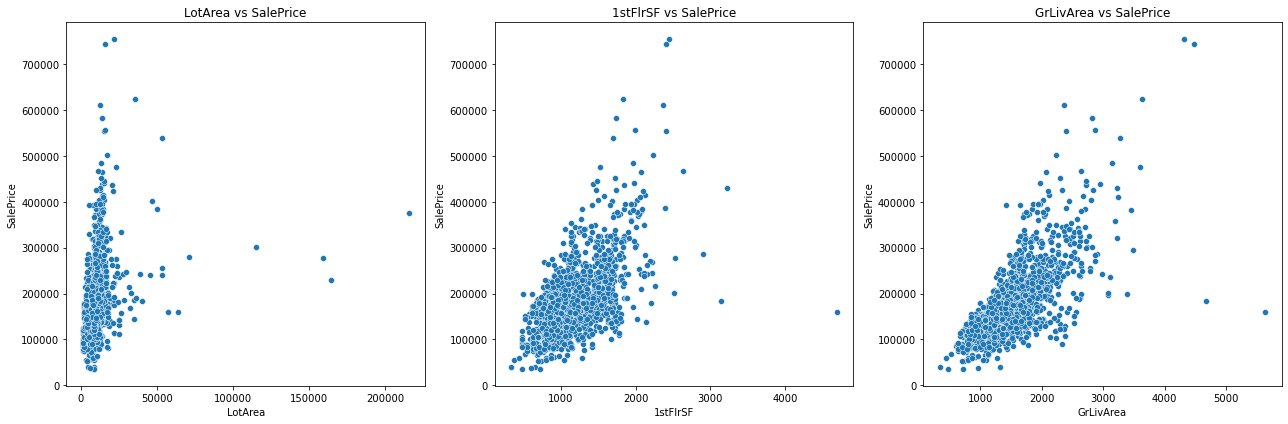

In [4]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for LotArea vs SalePrice
sns.scatterplot(x=ames_subset['LotArea'], y=ames_subset['SalePrice'], ax=axes[0])
axes[0].set_title('LotArea vs SalePrice')
axes[0].set_xlabel('LotArea')
axes[0].set_ylabel('SalePrice')

# Plot for 1stFlrSF vs SalePrice
sns.scatterplot(x=ames_subset['1stFlrSF'], y=ames_subset['SalePrice'], ax=axes[1])
axes[1].set_title('1stFlrSF vs SalePrice')
axes[1].set_xlabel('1stFlrSF')
axes[1].set_ylabel('SalePrice')

# Plot for GrLivArea vs SalePrice
sns.scatterplot(x=ames_subset['GrLivArea'], y=ames_subset['SalePrice'], ax=axes[2])
axes[2].set_title('GrLivArea vs SalePrice')
axes[2].set_xlabel('GrLivArea')
axes[2].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()


In [5]:
# Your written answer here - do these seem like good candidates for linear regression?
"""
LotArea vs SalePrice: There seems to be a general positive correlation between LotArea and SalePrice, but the relationship isn't perfectly linear. 
There are some outliers (e.g., larger lot sizes with lower sale prices), which might complicate the fit of a linear regression model.

1stFlrSF vs SalePrice: This also seems to have a positive linear relationship, with more square footage on the first floor generally correlating with higher sale prices. 
The relationship looks stronger and more consistent compared to LotArea.

GrLivArea vs SalePrice: This appears to have the most linear and consistent relationship. 
Larger living area square footage is clearly associated with higher sale prices, making it a very good candidate for linear regression.
"""

"\nLotArea vs SalePrice: There seems to be a general positive correlation between LotArea and SalePrice, but the relationship isn't perfectly linear. \nThere are some outliers (e.g., larger lot sizes with lower sale prices), which might complicate the fit of a linear regression model.\n\n1stFlrSF vs SalePrice: This also seems to have a positive linear relationship, with more square footage on the first floor generally correlating with higher sale prices. \nThe relationship looks stronger and more consistent compared to LotArea.\n\nGrLivArea vs SalePrice: This appears to have the most linear and consistent relationship. \nLarger living area square footage is clearly associated with higher sale prices, making it a very good candidate for linear regression.\n"

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [6]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
X = ames_subset['GrLivArea']

In [7]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
X = sm.add_constant(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.647e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):                        0.00
Time:                        11:47:18   Log-Likelihood:                         -18043.
No. Observations:                1460   AIC:                                  3.609e+04
Df Residuals:                    1459   BIC:                                  3.609e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea    118.0691      0.920    128.337      0.000     116.264     119.874
==============================================================================
Omnibus:                      242.301   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4400.101
Skew:                          -0.041   Prob(JB):                         0.00
Kurtosis:                      11.504   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Your written answer here - interpret model results
"""
Intercept (const): The coefficient of the intercept (constant term) tells us the expected SalePrice when GrLivArea is zero.
This value may not be meaningful in real terms, but it is part of the equation of the regression line.

GrLivArea Coefficient: The coefficient for GrLivArea represents the expected change in SalePrice for a one-unit increase in GrLivArea. 
For example, if the coefficient is 50,000, it means that for every additional square foot of above-grade living area, we expect the sale price to increase by $50,000.

R-squared: This statistic tells us how well the model explains the variance in the data.
An R-squared value closer to 1 indicates a stronger linear relationship between the independent and dependent variables. 
If the R-squared is 0.75, for example, 75% of the variation in SalePrice is explained by GrLivArea.

p-value: The p-value for GrLivArea will help to assess whether the coefficient is statistically significant. 
If the p-value is very small (typically < 0.05), we can reject the null hypothesis that the coefficient is zero, meaning GrLivArea has a statistically significant effect on SalePrice.

Standard Error: The standard error gives us an idea of the precision of the estimated coefficient. 
Smaller values indicate that the coefficient estimate is more precise.

Confidence Intervals: The 95% confidence intervals for the coefficients give us a range in which we are 95% confident the true coefficient lies.
"""

'\nIntercept (const): The coefficient of the intercept (constant term) tells us the expected SalePrice when GrLivArea is zero.\nThis value may not be meaningful in real terms, but it is part of the equation of the regression line.\n\nGrLivArea Coefficient: The coefficient for GrLivArea represents the expected change in SalePrice for a one-unit increase in GrLivArea. \nFor example, if the coefficient is 50,000, it means that for every additional square foot of above-grade living area, we expect the sale price to increase by $50,000.\n\nR-squared: This statistic tells us how well the model explains the variance in the data.\nAn R-squared value closer to 1 indicates a stronger linear relationship between the independent and dependent variables. \nIf the R-squared is 0.75, for example, 75% of the variation in SalePrice is explained by GrLivArea.\n\np-value: The p-value for GrLivArea will help to assess whether the coefficient is statistically significant. \nIf the p-value is very small (ty

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [9]:
# Your code here - define X
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

In [10]:
# Your code here - fit model and display results
model_multiple = sm.OLS(y, X).fit()
X = sm.add_constant(X)
model_multiple.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              6383.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):                        0.00
Time:                        11:47:18   Log-Likelihood:                         -17941.
No. Observations:                1460   AIC:                                  3.589e+04
Df Residuals:                    1457   BIC:                                  3.590e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LotArea        0.2854      0.146      1.960      0.050      -0.000       0.571
1stFlrSF      54.0877      3.880     13.939      0.000      46.476      61.700
GrLivArea     76.6880      2.921     26.258      0.000      70.959      82.417
==============================================================================
Omnibus:                      303.389   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9429.544
Skew:                          -0.129   Prob(JB):                         0.00
Kurtosis:                      15.447   Cond. No.                         50.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
"""
Intercept (const):This represents the expected SalePrice when all predictors (LotArea, 1stFlrSF, and GrLivArea) are zero. 
This might not be meaningful in the context of house prices because it’s unlikely that these features would all be zero in a realistic scenario, but it’s still part of the regression equation.

Coefficients for the Features:
LotArea: The coefficient for LotArea tells us how much we expect the SalePrice to change for each additional square foot of lot area. 
For example, if the coefficient is 0.25, then for every additional square foot of lot area, the SalePrice increases by $0.25.

1stFlrSF: The coefficient for 1stFlrSF represents the expected change in SalePrice for every additional square foot of first-floor space.

GrLivArea: The coefficient for GrLivArea represents the expected change in SalePrice for each additional square foot of above-grade living space.

R-squared:Is a measure of how well the model explains the variation in the dependent variable (SalePrice). 
A value closer to 1 indicates that the model explains a large portion of the variability in the data. For example, if R-squared is 0.85, it means that 85% of the variance in SalePrice is explained by the predictors (LotArea, 1stFlrSF, and GrLivArea).

Adjusted R-squared:Adjusts the R-squared value for the number of predictors in the model. It’s especially useful when comparing models with different numbers of predictors. 
Adjusted R-squared takes into account the possibility of overfitting.

p-values:The p-value for each coefficient helps to determine whether the predictor is statistically significant. 
If the p-value is less than a threshold (commonly 0.05), we can reject the null hypothesis that the coefficient is zero, meaning the feature has a significant effect on SalePrice.

Standard Errors and Confidence Intervals:The standard errors give us an idea of the precision of the coefficient estimates. 
Smaller standard errors indicate more precise estimates. The 95% confidence intervals provide a range within which the true coefficient value is likely to lie with 95% confidence.

Yes. It gives us a better fit than the simple linear regression model since it includes more predictors, potentially capturing more of the variation in SalePrice. 
Each of the predictors can be interpreted independently while accounting for the others, making the model more informative and likely more accurate.
"""

'\nIntercept (const):This represents the expected SalePrice when all predictors (LotArea, 1stFlrSF, and GrLivArea) are zero. \nThis might not be meaningful in the context of house prices because it’s unlikely that these features would all be zero in a realistic scenario, but it’s still part of the regression equation.\n\nCoefficients for the Features:\nLotArea: The coefficient for LotArea tells us how much we expect the SalePrice to change for each additional square foot of lot area. \nFor example, if the coefficient is 0.25, then for every additional square foot of lot area, the SalePrice increases by $0.25.\n\n1stFlrSF: The coefficient for 1stFlrSF represents the expected change in SalePrice for every additional square foot of first-floor space.\n\nGrLivArea: The coefficient for GrLivArea represents the expected change in SalePrice for each additional square foot of above-grade living space.\n\nR-squared:Is a measure of how well the model explains the variation in the dependent varia

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

In [12]:
ames_subset.columns = ames_subset.columns.str.strip()
ames_subset.columns

Index(['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'], dtype='object')

In [13]:
print(ames_subset.columns)


Index(['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'], dtype='object')


In [14]:
ames_subset.rename(columns={'1stFlrSF': 'FirstFlrSF'}, inplace=True)


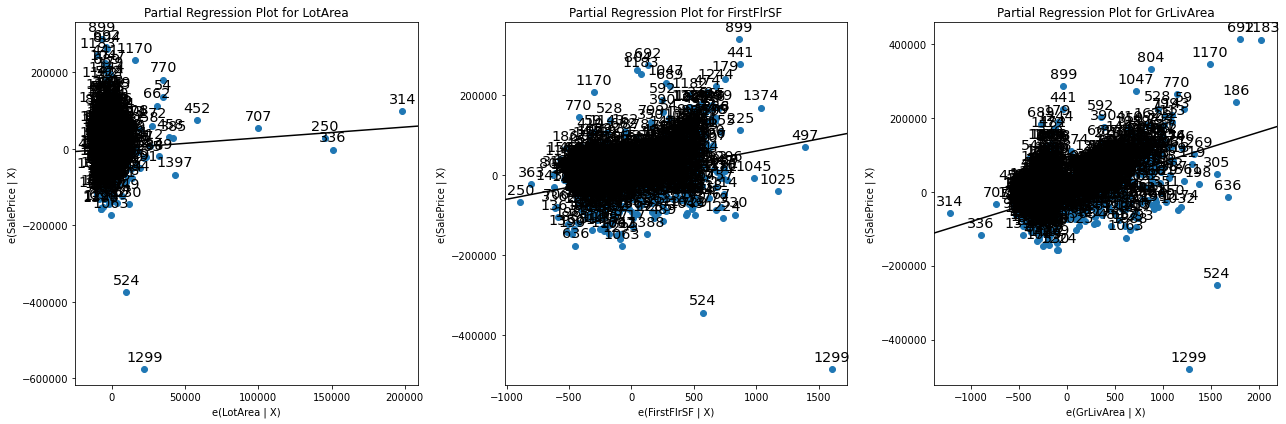

In [15]:
# Your code here - create partial regression plots for each predictor

from statsmodels.graphics.regressionplots import plot_partregress
# Creating partial regression plots for each predictor
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Partial regression plot for LotArea (controlling for FirstFlrSF and GrLivArea)
plot_partregress('SalePrice', 'LotArea', ['FirstFlrSF', 'GrLivArea'], data=ames_subset, ax=axes[0])
axes[0].set_title('Partial Regression Plot for LotArea')

# Partial regression plot for FirstFlrSF (controlling for LotArea and GrLivArea)
plot_partregress('SalePrice', 'FirstFlrSF', ['LotArea', 'GrLivArea'], data=ames_subset, ax=axes[1])
axes[1].set_title('Partial Regression Plot for FirstFlrSF')

# Partial regression plot for GrLivArea (controlling for LotArea and FirstFlrSF)
plot_partregress('SalePrice', 'GrLivArea', ['LotArea', 'FirstFlrSF'], data=ames_subset, ax=axes[2])
axes[2].set_title('Partial Regression Plot for GrLivArea')

# Displaying the plots
plt.tight_layout()
plt.show()



In [16]:
# Your written answer here - explain what you see, and how this relates
"""
I visualized the relationship between each predictor variable (LotArea, FirstFlrSF, and GrLivArea) and the target variable SalePrice, while controlling for the other predictor variables in the model.
The goal of these plots is to help us understand how each individual feature contributes to the target variable, independent of the influence of other features.
"""
# to what you saw in Step 1. What do you notice?
"""
Partial regression plots provide a clearer view of how each feature independently contributes to the variation in SalePrice. 
By controlling for other predictors, we can assess the strength and nature of each relationship:

GrLivArea is the strongest predictor, with a clear and consistent positive relationship with SalePrice.
LotArea also shows a strong positive relationship, indicating that larger lots tend to increase home prices.
FirstFlrSF has a positive but somewhat weaker relationship, suggesting it is important but less influential on its own compared to LotArea or GrLivArea.
"""

'\nPartial regression plots provide a clearer view of how each feature independently contributes to the variation in SalePrice. \nBy controlling for other predictors, we can assess the strength and nature of each relationship:\n\nGrLivArea is the strongest predictor, with a clear and consistent positive relationship with SalePrice.\nLotArea also shows a strong positive relationship, indicating that larger lots tend to increase home prices.\nFirstFlrSF has a positive but somewhat weaker relationship, suggesting it is important but less influential on its own compared to LotArea or GrLivArea.\n'

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [17]:
# Your code here - import linear regression from scikit-learn and create and fit model
# Define the feature set (independent variables) and target variable (SalePrice)
X = ames_subset[['LotArea', 'FirstFlrSF', 'GrLivArea']]  # Features
y = ames_subset['SalePrice']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model from scikit-learn
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [18]:
# Your code here - compare R-Squared
r_squared_sklearn = r2_score(y_test, y_pred)
print(f"R-Squared (scikit-learn): {r_squared_sklearn:.4f}")

R-Squared (scikit-learn): 0.6259


In [19]:
# Your code here - compare intercept and coefficients
intercept_sklearn = model.intercept_
coefficients_sklearn = model.coef_

# Print the results
print(f"Intercept (scikit-learn): {intercept_sklearn:.4f}")
print(f"Coefficients (scikit-learn): {coefficients_sklearn}")

Intercept (scikit-learn): -6261.5975
Coefficients (scikit-learn): [ 0.30033318 56.21295883 77.7528426 ]


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.